<a href="https://colab.research.google.com/github/BongGuenJun/Python/blob/main-branch/Deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
myfile = files.upload()

Saving caffeinetest.csv to caffeinetest.csv


   Volume (ml)  Calories  Caffeine (mg)
0   256.993715         0            277
1   250.191810         0            145
2   250.191810       150            100
3   250.191810         0            430
4   250.191810         0             66
   Caffeine (mg)  Calories  Volume (ml)
0       0.915963 -0.796708    -0.622966
1       0.066339 -0.796708    -0.670284
2      -0.223306  0.785572    -0.670284
3       1.900754 -0.796708    -0.670284
4      -0.442148 -0.796708    -0.670284
   Coffee  Energy Drinks  Energy Shots  Soft Drinks  Tea  Water
0       1              0             0            0    0      0
1       1              0             0            0    0      0
2       1              0             0            0    0      0
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 23)                92        
                                           

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  if sys.path[0] == '':


Epoch 1/500
21/21 [==============================] - 1s 6ms/step - loss: 1.7206 - accuracy: 0.3295
Epoch 2/500
21/21 [==============================] - 0s 8ms/step - loss: 1.5260 - accuracy: 0.4541
Epoch 3/500
21/21 [==============================] - 0s 8ms/step - loss: 1.4066 - accuracy: 0.4541
Epoch 4/500
21/21 [==============================] - 0s 5ms/step - loss: 1.3124 - accuracy: 0.4770
Epoch 5/500
21/21 [==============================] - 0s 5ms/step - loss: 1.2286 - accuracy: 0.5131
Epoch 6/500
21/21 [==============================] - 0s 5ms/step - loss: 1.1464 - accuracy: 0.5738
Epoch 7/500
21/21 [==============================] - 0s 7ms/step - loss: 1.0734 - accuracy: 0.6230
Epoch 8/500
21/21 [==============================] - 0s 5ms/step - loss: 1.0156 - accuracy: 0.6344
Epoch 9/500
21/21 [==============================] - 0s 6ms/step - loss: 0.9696 - accuracy: 0.6623
Epoch 10/500
21/21 [==============================] - 0s 4ms/step - loss: 0.9288 - accuracy: 0.6754
Epoch 11/

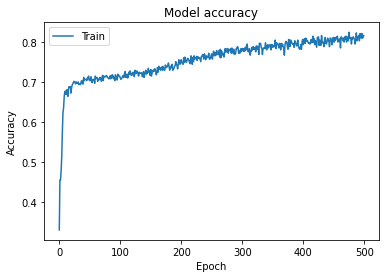

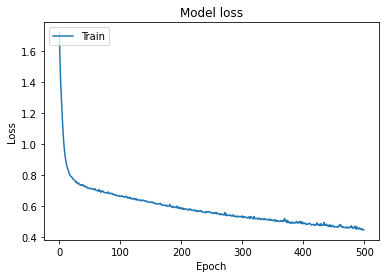

In [ ]:
import numpy as np
import io
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

df = pd.read_csv(io.BytesIO(myfile['caffeinetest.csv']))
print(df.iloc[:,1:4].head())

normalization_df = (df - df.mean())/df.std()
normalization_df.head()

print(normalization_df.iloc[:,0:3].head())
x = normalization_df.iloc[:,0:3]
y = df.iloc[:,4]
y = pd.get_dummies(y)
print(y[0:3])

model = Sequential()
model.add(Dense(23,  input_dim=3, activation='relu'))
model.add(Dense(115,  activation='relu'))
model.add(Dense(6, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history=model.fit(x, y, epochs=500, batch_size=30)

plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
